# Assignment 3 - Natalie Seah
### Due 9/21. Do four of five.

1. 
- Open the NHANES (or Ames prices or college completion datasets, if you prefer)
- Find two categorical variables of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis like we did with police use of force, but always be aware of how dirty the data are)
- Compute a contingency table for your categorical $X$ and $Y$
- Discuss any interesting patterns (or lack of one) that you observe

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
nhanes = pd.read_csv("data/nhanes_data_17_18.csv")
nhanes.head()

/var/folders/x1/bmrwcd_x4cj7tb52j6s97xzc0000gn/T/ipykernel_1561/4032396149.py:2: DtypeWarning: Columns (142) have mixed types. Specify dtype option on import or set low_memory=False.
  nhanes = pd.read_csv("data/nhanes_data_17_18.csv")


SEQN GeneralHealthCondition  EverBreastfedOrFedBreastmilk  \
0  93703.0                    NaN                           1.0   
1  93704.0                    NaN                           1.0   
2  93705.0                   Good                           NaN   
3  93706.0              Very good                           NaN   
4  93707.0                   Good                           NaN   

   AgeStoppedBreastfeedingdays  AgeFirstFedFormuladays  \
0                        273.0                     1.0   
1                         60.0                     3.0   
2                          NaN                     NaN   
3                          NaN                     NaN   
4                          NaN                     NaN   

   AgeStoppedReceivingFormuladays  AgeStartedOtherFoodbeverage  \
0                           365.0                        152.0   
1                           365.0                        126.0   
2                             NaN                          NaN   
3                             NaN                          NaN   
4                             NaN                          NaN   

   AgeFirstFedMilkdays TypeOfMilkFirstFedWholeMilk  TypeOfMilkFirstFed2Milk  \
0                365.0       Whole or regular milk                      NaN   
1                365.0       Whole or regular milk                      NaN   
2                  NaN                         NaN                      NaN   
3                  NaN                         NaN                      NaN   
4                  NaN                         NaN                      NaN   

   ...  DaysSmokedCigsDuringPast30Days  AvgCigarettesdayDuringPast30Days  \
0  ...                             NaN                               NaN   
1  ...                             NaN                               NaN   
2  ...                             NaN                               NaN   
3  ...                             NaN                               NaN   
4  ...                             NaN                               NaN   

   TriedToQuitSmoking  TimesStoppedSmokingCigarettes  \
0                 NaN                            NaN   
1                 NaN                            NaN   
2                 NaN                            NaN   
3                 NaN                            NaN   
4                 NaN                            NaN   

  HowLongWereYouAbleToStopSmoking UnitOfMeasureDayweekmonthyear_2_SMQ  \
0                             NaN                                 NaN   
1                             NaN                                 NaN   
2                             NaN                                 NaN   
3                             NaN                                 NaN   
4                             NaN                                 NaN   

  CurrentSelfreportedHeightInches  CurrentSelfreportedWeightPounds  \
0                             NaN                              NaN   
1                             NaN                              NaN   
2                            63.0                            165.0   
3                            68.0                            145.0   
4                             NaN                              NaN   

   TriedToLoseWeightInPastYear  TimesLost10LbsOrMoreToLoseWeight  
0                          NaN                               NaN  
1                          NaN                               NaN  
2                          0.0                  11 times or more  
3                          0.0                             Never  
4                          NaN                               NaN  

[5 rows x 198 columns]

In [35]:
# How many missing values are there?
nhanes['EducationLevelAdults20_na'] = nhanes['EducationLevelAdults20'].isna() # Create a missing value dummy
nhanes['EducationLevelAdults20_na'].value_counts() # How many missings?

EducationLevelAdults20_na
False    5263
True     3103
Name: count, dtype: int64

In [19]:
nhanes['HowHealthyIsTheDiet_na'] = nhanes['HowHealthyIsTheDiet'].isna()
nhanes['HowHealthyIsTheDiet_na'].value_counts()

HowHealthyIsTheDiet_na
False    5826
True     2540
Name: count, dtype: int64

In [37]:
pd.crosstab(nhanes['EducationLevelAdults20_na'], nhanes['HowHealthyIsTheDiet'], normalize='columns') 

HowHealthyIsTheDiet        Excellent     Fair      Good      Poor  Very good
EducationLevelAdults20_na                                                   
False                       0.895216  0.88982  0.900131  0.906329   0.928263
True                        0.104784  0.11018  0.099869  0.093671   0.071737

I don't really see any interesting patterns in this contingency table. The conditional proportions don't seem to be systematicallly different across the different levels of diet healthiness.

2. 
- Open the NHANES dataset
- Find a categorical and numeric variable of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis, but always be aware of them)
- Make descriptive tables and grouped kernel density plots to represent the variation in your numeric $Y$ conditional on your categorical $X$
- Discuss any interesting patterns (or lack of one) that you observe

In [48]:
nhanes['BodyMassIndexKgm2_na'] = nhanes['BodyMassIndexKgm2'].isna() # Create a missing value dummy
nhanes['BodyMassIndexKgm2_na'].value_counts()

BodyMassIndexKgm2_na
False    8005
True      361
Name: count, dtype: int64

In [46]:
nhanes['EducationLevelAdults20_na'] = nhanes['EducationLevelAdults20'].isna() # Create a missing value dummy
nhanes['EducationLevelAdults20_na'].value_counts()

EducationLevelAdults20_na
False    5263
True     3103
Name: count, dtype: int64

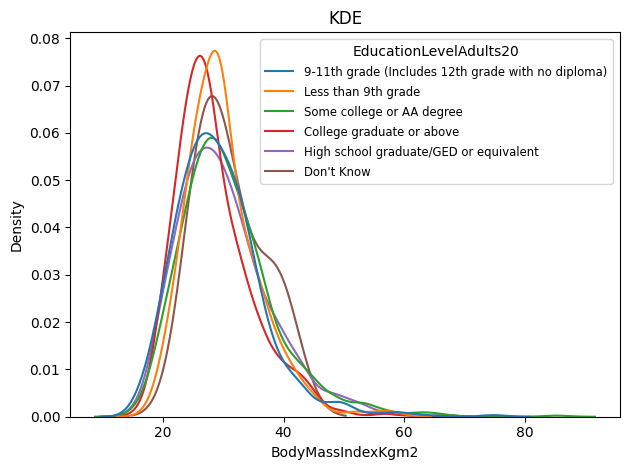

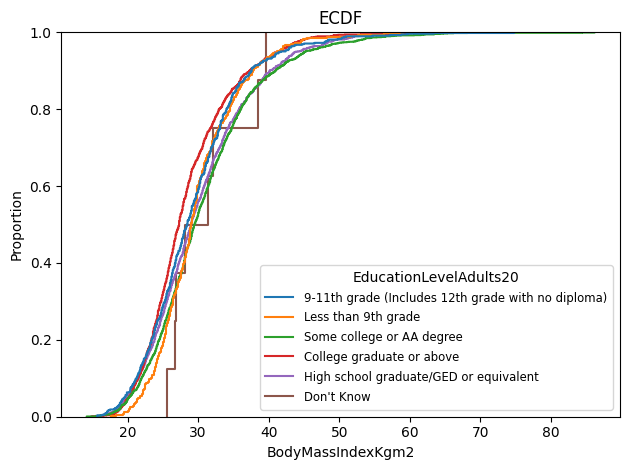

BodyMassIndexKgm2  \
                                                               count   
EducationLevelAdults20                                                 
9-11th grade (Includes 12th grade with no diploma)             584.0   
College graduate or above                                     1245.0   
Don't Know                                                       8.0   
High school graduate/GED or equivalent                        1231.0   
Less than 9th grade                                            437.0   
Some college or AA degree                                     1668.0   

                                                                               \
                                                         mean       std   min   
EducationLevelAdults20                                                          
9-11th grade (Includes 12th grade with no diploma)  29.278253  7.248268  15.7   
College graduate or above                           28.502490  6.542833  14.9   
Don't Know                                          31.112500  5.406461  25.6   
High school graduate/GED or equivalent              30.132169  7.546911  14.8   
Less than 9th grade                                 29.939817  6.110948  17.7   
Some college or AA degree                           30.823261  8.061545  14.2   

                                                                           \
                                                       25%    50%     75%   
EducationLevelAdults20                                                      
9-11th grade (Includes 12th grade with no diploma)  24.275  28.45  33.100   
College graduate or above                           24.100  27.30  31.700   
Don't Know                                          26.775  29.80  33.700   
High school graduate/GED or equivalent              24.700  29.00  34.200   
Less than 9th grade                                 25.700  29.00  32.900   
Some college or AA degree                           25.400  29.50  34.725   

                                                          
                                                     max  
EducationLevelAdults20                                    
9-11th grade (Includes 12th grade with no diploma)  74.8  
College graduate or above                           67.7  
Don't Know                                          39.6  
High school graduate/GED or equivalent              62.0  
Less than 9th grade                                 59.1  
Some college or AA degree                           86.2

In [70]:
conditioner = 'EducationLevelAdults20'

# KDE plot
ax = sns.kdeplot(
    data=nhanes, 
    x='BodyMassIndexKgm2', 
    hue=conditioner, 
    common_norm=False
)
ax.set(title='KDE')

# Make the legend smaller
legend = ax.get_legend()
if legend:
    for text in legend.get_texts():
        text.set_fontsize('small')  

plt.tight_layout()
plt.show()

# ECDF plot
ax = sns.ecdfplot(
    data=nhanes, 
    x='BodyMassIndexKgm2', 
    hue=conditioner
)
ax.set(title='ECDF')

legend = ax.get_legend()
if legend:
    for text in legend.get_texts():
        text.set_fontsize('small')

plt.tight_layout()
plt.show()

nhanes.loc[:,['BodyMassIndexKgm2', conditioner]].groupby(conditioner).describe()

All groups are right-skewed, meaning most people are clustered around lower BMI values but there’s a long tail of higher BMI. The distributions overlap considerably, so while there are differences in means, BMI ranges are shared across education levels. The KDE plot shows that college graduates and those with less than 9th grade education have the highest peaks, meaning the BMI values for those groups are concentrated around their respective peaks. The college graduate peak is slightly left, indicating lower BMI, while the less than 9th grade peak is slightly right, indicating higher BMI, suggesting a modest association between education level and BMI.

The "Don't Know" group has a staircase shape in the ECDF which highlights that there are very few individuals in this group. All of the lines in the ECDF are pretty close together, indicating that BMI distributions are pretty similar across education groups.

From the descriptive table, there’s a subtle trend where individuals with higher education (college graduate or above) tend to have slightly lower average BMI compared to those with lower education. This might suggest that higher education is sometimes associated with healthier lifestyle choices, but the difference is so subtle that it's hard to tell. 

3. 
We showed that the mean and median could be discovered by minimizing various kinds of loss functions; this is what machine learning is. To make a prediction $\hat{y}(z)$ of $Y$ when $X=z$, minimize the mean squared error:
$$
MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2 \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$
Show that the solution to this problem is the LCLS/Naradaya-Watson estimator.

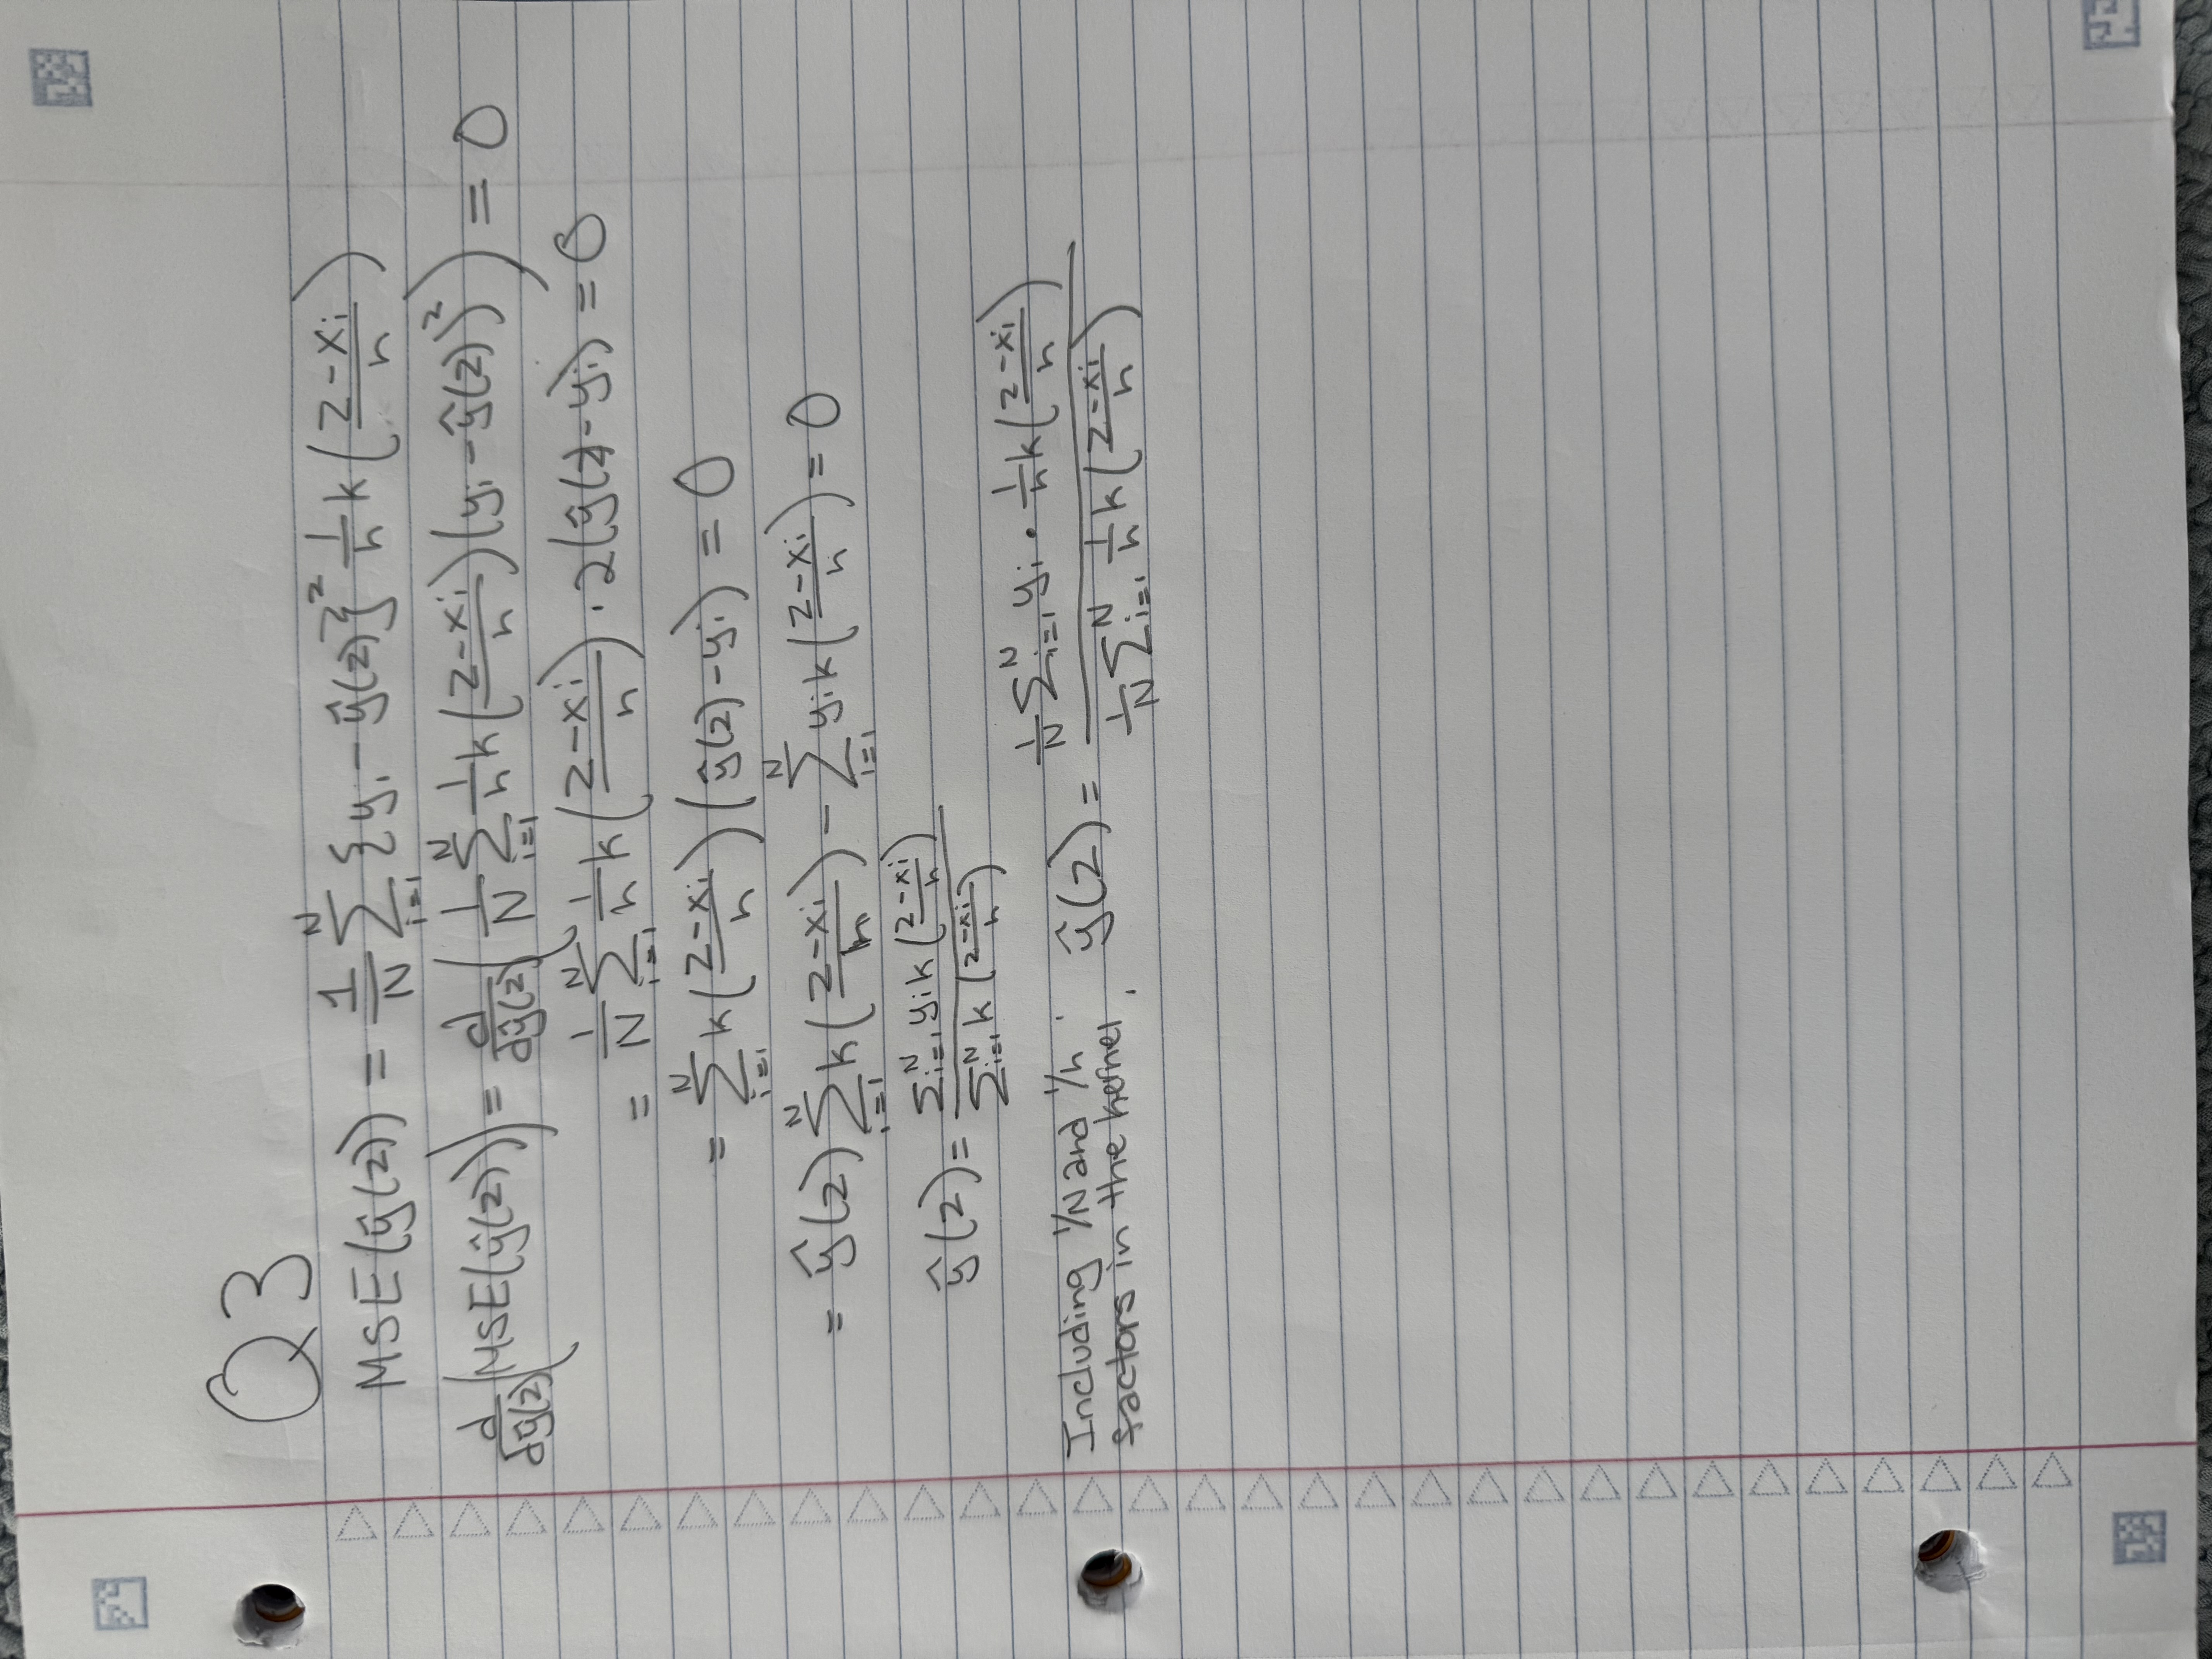

4. 
- Write a class or set of functions that implement the LCLS/Naradaya-Watson estimator, using the Silverman plug-in estimate for the conditioning variable $X$ as the bandwidth.
- From one of the course data sets, find two numeric variables of interest, analyze their relationship with the the LCLS/Naradaya-Watson estimator, and discuss your results.

In [91]:
ames = pd.read_csv("data/ames_prices.csv")
ames.head()

Order        PID  area   price  MS.SubClass MS.Zoning  Lot.Frontage  \
0      1  526301100  1656  215000           20        RL         141.0   
1      2  526350040   896  105000           20        RH          80.0   
2      3  526351010  1329  172000           20        RL          81.0   
3      4  526353030  2110  244000           20        RL          93.0   
4      5  527105010  1629  189900           60        RL          74.0   

   Lot.Area Street Alley  ... Screen.Porch Pool.Area Pool.QC  Fence  \
0     31770   Pave   NaN  ...            0         0     NaN    NaN   
1     11622   Pave   NaN  ...          120         0     NaN  MnPrv   
2     14267   Pave   NaN  ...            0         0     NaN    NaN   
3     11160   Pave   NaN  ...            0         0     NaN    NaN   
4     13830   Pave   NaN  ...            0         0     NaN  MnPrv   

  Misc.Feature Misc.Val Mo.Sold Yr.Sold Sale.Type Sale.Condition  
0          NaN        0       5    2010       WD          Normal  
1          NaN        0       6    2010       WD          Normal  
2         Gar2    12500       6    2010       WD          Normal  
3          NaN        0       4    2010       WD          Normal  
4          NaN        0       3    2010       WD          Normal  

[5 rows x 82 columns]

In [77]:
def compute_bandwidth(x):
    iqr = np.quantile(x, 0.75) - np.quantile(x, 0.25)
    h = 0.9 * min(np.std(x), iqr / 1.34) * len(x) ** (-0.2)
    print(f'Computed bandwidth is: {h}')
    return h

In [79]:
def compute_kernel_matrix(x, grid, h):
    """Compute Gaussian kernel matrix between x and grid."""
    I = -(x.to_numpy().reshape(-1,1) - grid.reshape(1,-1)) ** 2
    K = np.exp(I / (2 * h**2)) / np.sqrt(2 * np.pi * h**2)
    return K

In [80]:
def lcls_estimate(y, K):
    """Compute Local Constant Least Squares estimate."""
    numerator = y @ K
    denominator = np.sum(K, axis=0)
    return numerator / denominator


In [105]:
def lcls(x, y, h=None, plot=True, df=None):
    """Main LCLS function that computes the estimate and optionally plots."""
    n = len(x)
    grid = np.sort(x.unique())
    
    if h is None:
        h = compute_bandwidth(x)
    
    K = compute_kernel_matrix(x, grid, h)
    y_hat = lcls_estimate(y, K)
    
    if plot:
        sns.scatterplot(data=df, x=x.name, y=y.name, alpha=0.05)
        sns.lineplot(x=grid, y=y_hat, color='orange')
        plt.show()
    
    return y_hat, grid

Computed bandwidth is: 83.92152075315373


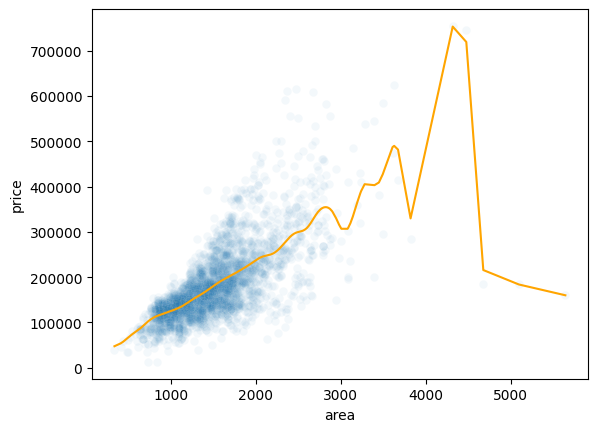

In [106]:
x = ames['area']
y = ames['price']

y_hat, grid = lcls(x, y, df=ames)


Based on the LCLS/Nadaraya-Watson estimator, the line is smooth and roughly linear for houses up to ~3000 sq ft, which indicates that price increases steadily with area in this range. This is typical for most standard houses, as additional square footage generally adds value at a fairly constant rate. Beyond 3000 sq ft, there are some small spikes up and down, and eventually a large upward and downward jump, which kind of makes sense because houses above 3000 sq ft are much less common in the dataset. The spikes reflect genuine variability in large-home pricing and illustrate the effect of sparse data on local averaging.


5. 
- In any of the available data sets, investigate the relationships between pairs of variables $(X,Y)$ with a scatterplot and CEF (for example, price on area)
- Is this relationship plausibly causal, or are there missing variables that might explain at least part of the relationship between your variables? These can be "conceptual" rather than "practical"; for example, 'talent' or 'grit' probably explain education outcomes, but are almost impossible to measure. We are asking whether there are hypothetical **threats to causal identification** of the effect of $X$ on $Y$.
- Explain how, regardless of the threat to causal identification, you can still use your model to predict $Y$ given $X$, as long as you don't intervene in the system to control the outcome